In [3]:
# Initially importing libraries 
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
# Uploading dataset
try:
    df = pd.read_csv('water_potability.csv')
    print("Dataset imported successfully!")
except FileNotFoundError:
    print("Error: 'water_potability.csv' not found. Please check the file path.")

Dataset imported successfully!


In [30]:
# Summary statistics and initial review of dataset
print("1. First 5 Rows of Dataframe")
print(df.head())

print("2. Dataframe information (Data Types and Non-Null Counts)")
df.info()

print("3. Descriptive Statistics")
print(df.describe())

print("4. Missing Values Count by Column")
print(df.isnull().sum())


1. First 5 Rows of Dataframe
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
2. Dataframe information (Data Types and Non-Null Counts)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 327

In [11]:
# Cleaning up dataset 

# Drop observations with missing values 
df_cleaned = df.dropna().copy()
rows_after_dropping_nan = df_cleaned.shape[0]
print(f"NaNs dropped, current rows: {rows_after_dropping_nan}")

# Drop duplicate Observations 
df_cleaned.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = df_cleaned.shape[0]
print(f"Duplicates dropped, current rows: {rows_after_dropping_duplicates} ")

# Convert Potability to Boolean
if 'Potability' in df_cleaned.columns:
    if df_cleaned['Potability'].isin([0, 1]).all():
        df_cleaned['Potability'] = df_cleaned['Potability'].astype(bool)
        print("Successfully converted 'Potability' to boolean.")
    else:
        print("\nWarning: 'Potability' column contains values other than 0 or 1. Cannot convert directly to bool.")
else:
    print("\nError: 'Potability' column not found in DataFrame.")

# Rounding Float64 Observations 
float_cols = df_cleaned.select_dtypes(include=['float64']).columns
if not float_cols.empty:
    for col in float_cols:
        df_cleaned[col] = df_cleaned[col].round(3)
    print(f"Rounded {len(float_cols)} float64 columns to 3 decimal places: {list(float_cols)}")
else:
    print("No float64 columns found to round.")

print(df_cleaned.head())

NaNs dropped, current rows: 2011
Duplicates dropped, current rows: 2011 
Successfully converted 'Potability' to boolean.
Rounded 9 float64 columns to 3 decimal places: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
       ph  Hardness     Solids  Chloramines  Sulfate  Conductivity  \
3   8.317   214.373  22018.417        8.059  356.886       363.267   
4   9.092   181.102  17978.986        6.547  310.136       398.411   
5   5.584   188.313  28748.688        7.545  326.678       280.468   
6  10.224   248.072  28749.717        7.513  393.663       283.652   
7   8.636   203.362  13672.092        4.563  303.310       474.608   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3          18.437          100.342      4.629       False  
4          11.558           31.998      4.075       False  
5           8.400           54.918      2.560       False  
6          13.790           84.604      2.673     

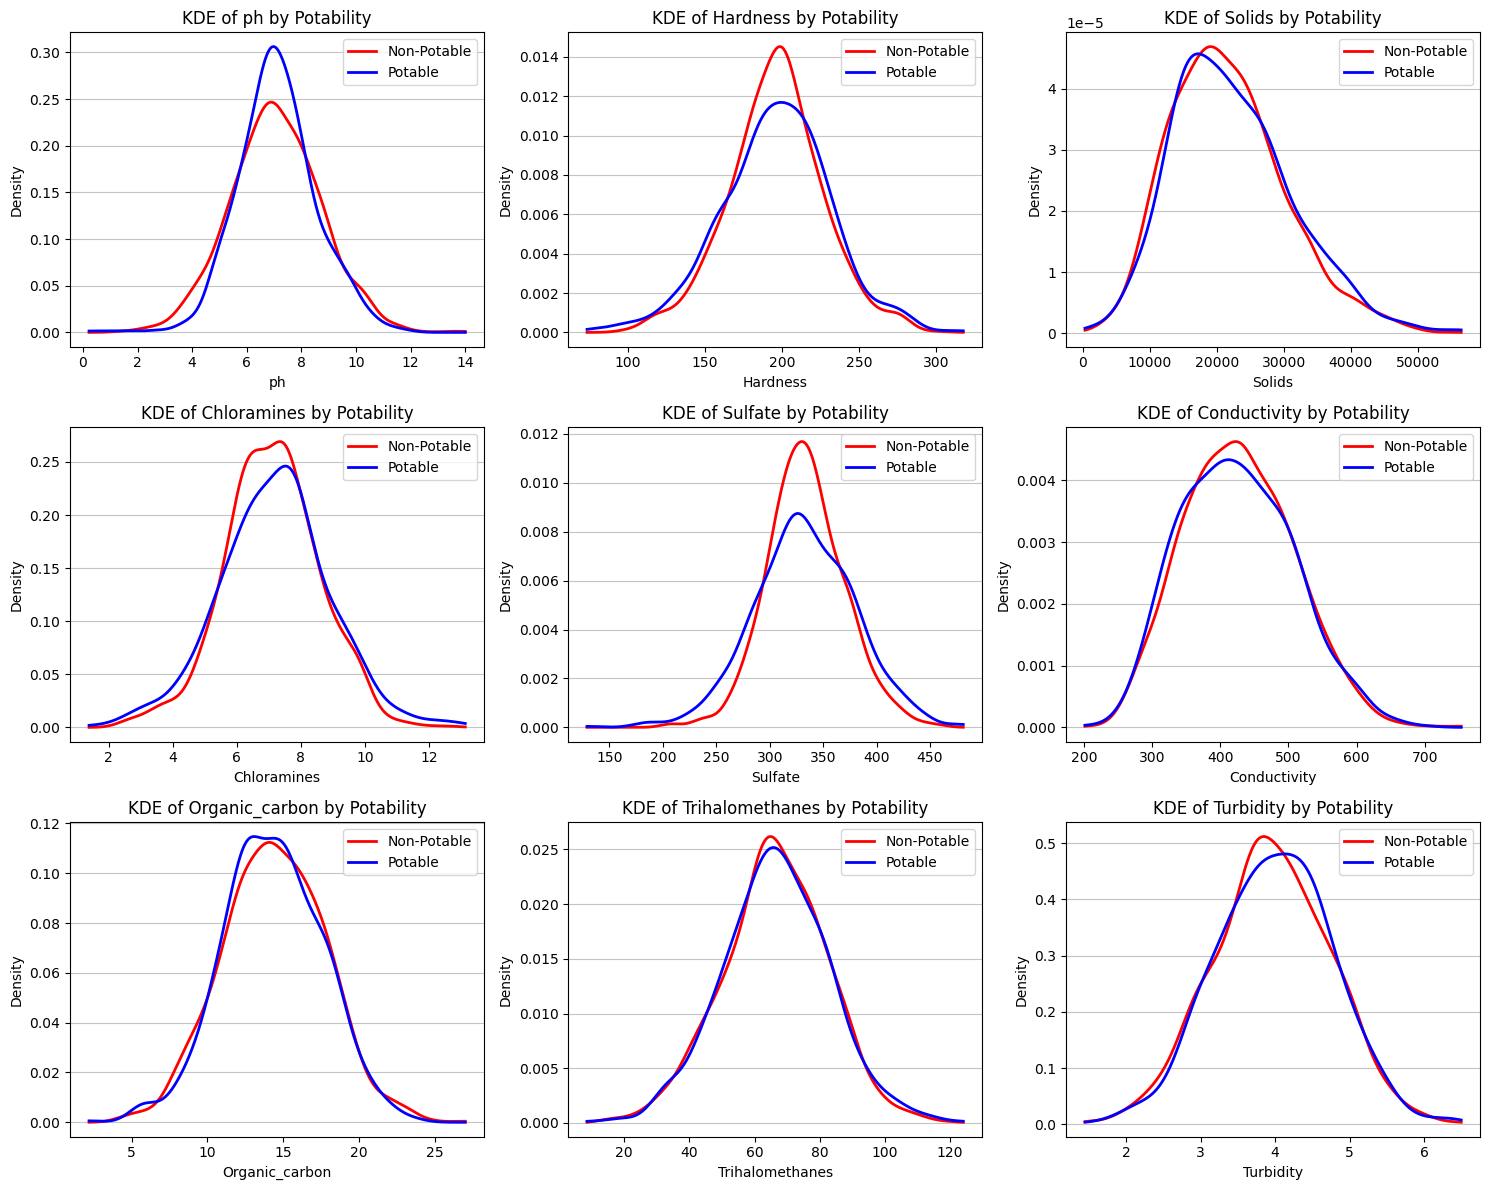

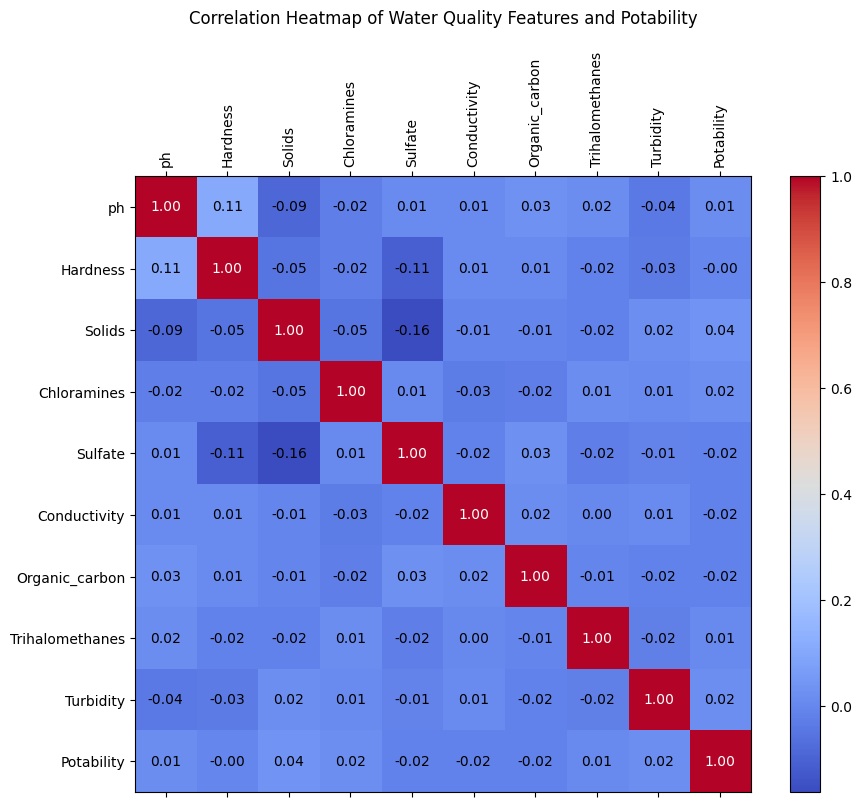

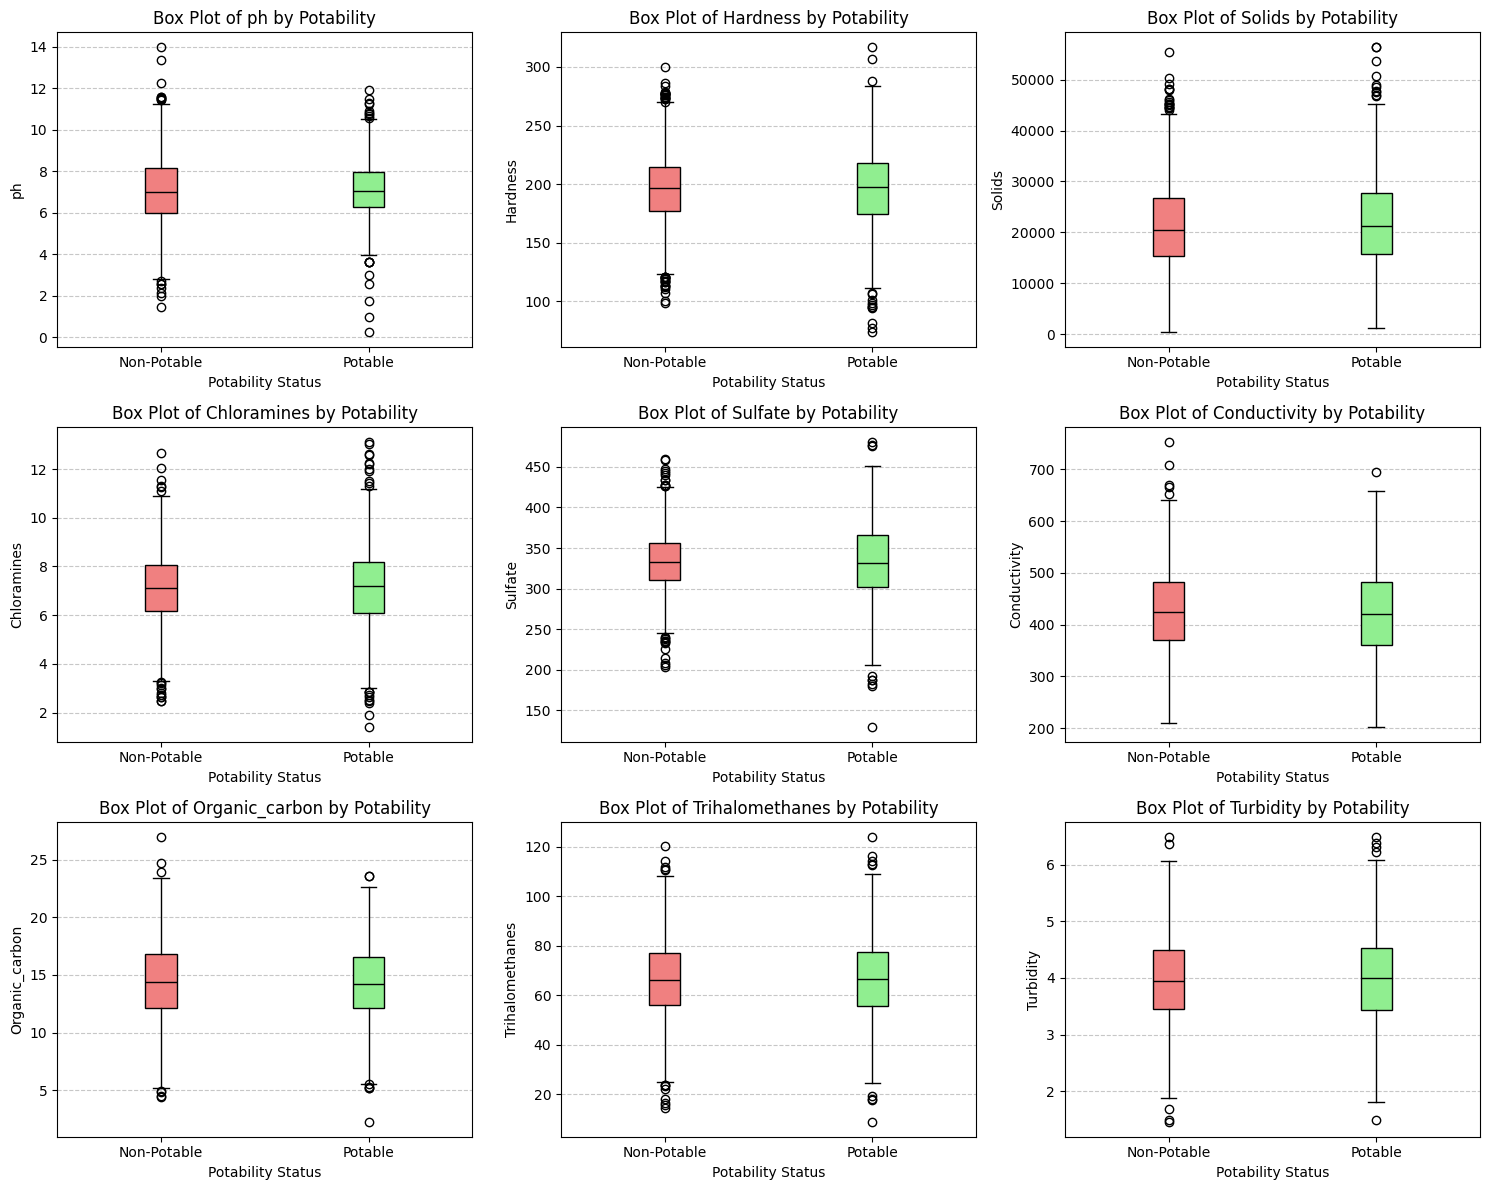

In [31]:
# Initial visualizations 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#~~~~~~~~~~~~~~~~~~~~~~~ KDE Plots ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df_potable = df_cleaned[df_cleaned['Potability'] == True]
df_non_potable = df_cleaned[df_cleaned['Potability'] == False]
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_features = len(numerical_features)
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    if len(df_non_potable[feature].dropna()) > 1:
        kde_non_potable = gaussian_kde(df_non_potable[feature].dropna())
        x_vals = np.linspace(df_cleaned[feature].min(), df_cleaned[feature].max(), 500)
        plt.plot(x_vals, kde_non_potable(x_vals), color='red', label='Non-Potable', linewidth=2)
    else:
        print(f"Warning: Not enough data in '{feature}' for Non-Potable to compute KDE.")

    if len(df_potable[feature].dropna()) > 1:
        kde_potable = gaussian_kde(df_potable[feature].dropna())
        plt.plot(x_vals, kde_potable(x_vals), color='blue', label='Potable', linewidth=2)
    else:
        print(f"Warning: Not enough data in '{feature}' for Potable to compute KDE.")

    plt.title(f'KDE of {feature} by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(axis='y', alpha=0.75) # Add a grid for readability

plt.tight_layout()
plt.show()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~ Heatmap ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=False)
plt.colorbar()
plt.title('Correlation Heatmap of Water Quality Features and Potability', pad=20)
num_vars = correlation_matrix.shape[0]
plt.xticks(range(num_vars), correlation_matrix.columns, rotation=90) 
plt.yticks(range(num_vars), correlation_matrix.columns)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f"{val:.2f}",
             ha='center', va='center', color='black' if abs(val) < 0.6 else 'white') 

plt.show()


#~~~~~~~~~~~~~~~~~~~~~~~~~ Box Plots ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
n_features = len(numerical_features)
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols 
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    data_for_plot = [df_cleaned[df_cleaned['Potability'] == 0][feature].dropna(), # Non-Potable
                     df_cleaned[df_cleaned['Potability'] == 1][feature].dropna()] # Potable
    bp = plt.boxplot(data_for_plot, labels=['Non-Potable', 'Potable'],
                     patch_artist=True, 
                     medianprops=dict(color='black'))
    colors = ['lightcoral', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(f'Box Plot of {feature} by Potability')
    plt.xlabel('Potability Status')
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

Decision Tree Model training complete.
Accuracy: 0.6026

Classification Report:
              precision    recall  f1-score   support

 Non-Potable       0.67      0.66      0.67       360
     Potable       0.51      0.51      0.51       244

    accuracy                           0.60       604
   macro avg       0.59      0.59      0.59       604
weighted avg       0.60      0.60      0.60       604


Confusion Matrix:
[[239 121]
 [119 125]]


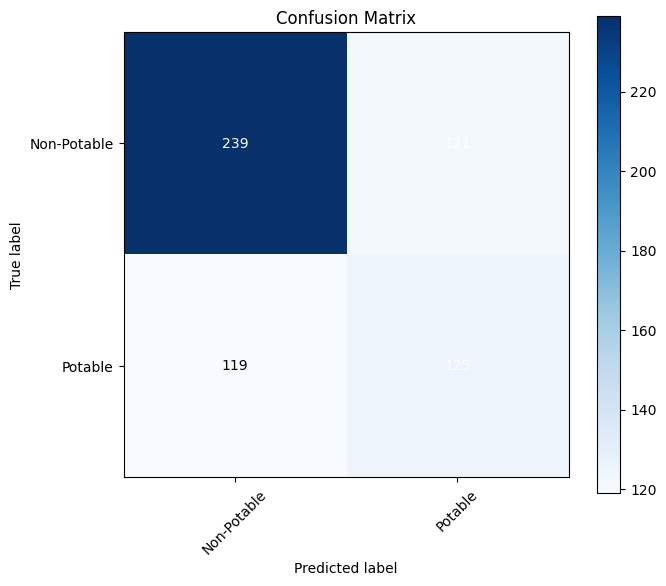

Performing Grid Search
Fitting 5 folds for each of 90 candidates, totalling 450 fits

 Grid Search Complete 
Best parameters found by GridSearchCV:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation accuracy: 0.6546

--- Evaluating Best Decision Tree Model on Test Set ---
Accuracy (Tuned Decision Tree): 0.6026

Classification Report (Tuned Decision Tree):
              precision    recall  f1-score   support

 Non-Potable       0.61      0.90      0.73       360
     Potable       0.53      0.17      0.25       244

    accuracy                           0.60       604
   macro avg       0.57      0.53      0.49       604
weighted avg       0.58      0.60      0.54       604



In [32]:
# Building an initial Decision Tree 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#~~~~~~~~~~~~~~~~~~~~~~~~ Setting up an initial decision tree ~~~~~~~~~~~~~~~~~~~~~~~
df_cleaned['Potability'] = df_cleaned['Potability'].astype(int)
X = df_cleaned.drop('Potability', axis=1)
y = df_cleaned['Potability'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify=y)
dt_classifier = DecisionTreeClassifier(random_state=11)
dt_classifier.fit(X_train, y_train)
print("Decision Tree Model training complete.")

# Evaluation Steps 
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}") 

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Potable', 'Potable']))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(7, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Potable', 'Potable'], rotation=45)
plt.yticks(tick_marks, ['Non-Potable', 'Potable'])
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#~~~~~~~~~~~~~~~~ Hyperparameter Tuning ~~~~~~~~~~~~~~~~~~~~~
param_grid = {
    'max_depth': [None, 5, 10, 15, 20], 
    'min_samples_split': [2, 10, 20],   
    'min_samples_leaf': [1, 5, 10],     
    'criterion': ['gini', 'entropy']    
}
dt_classifier = DecisionTreeClassifier(random_state=11)

grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1,
                           n_jobs=-1)
print("Performing Grid Search")
grid_search.fit(X_train, y_train)
print("\n Grid Search Complete ")

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
best_dt_classifier = grid_search.best_estimator_ 
print("\n--- Evaluating Best Decision Tree Model on Test Set ---")
y_pred_tuned = best_dt_classifier.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Decision Tree): {accuracy_tuned:.4f}")
print("\nClassification Report (Tuned Decision Tree):")
print(classification_report(y_test, y_pred_tuned, target_names=['Non-Potable', 'Potable']))



Random Forest model training complete.
Accuracy (Random Forest): 0.6805

Classification Report (Random Forest):
              precision    recall  f1-score   support

 Non-Potable       0.68      0.87      0.76       360
     Potable       0.68      0.40      0.50       244

    accuracy                           0.68       604
   macro avg       0.68      0.63      0.63       604
weighted avg       0.68      0.68      0.66       604


Confusion Matrix (Random Forest):
[[314  46]
 [147  97]]


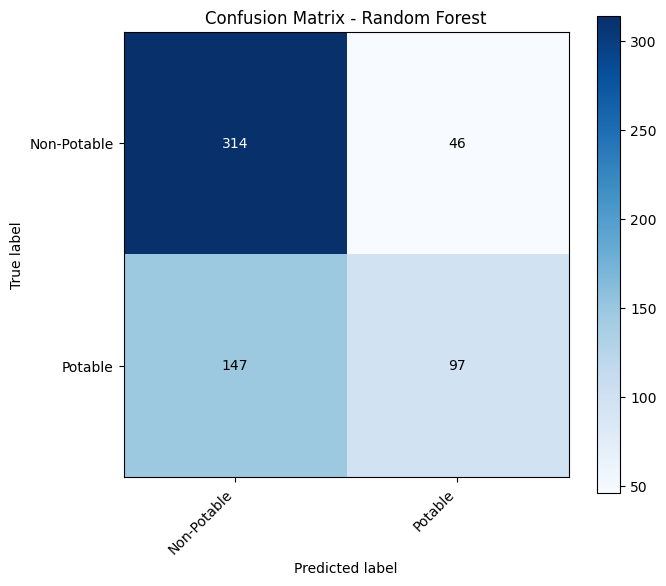

In [26]:
# Random Forest 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=11)
rf_classifier.fit(X_train, y_train)
print("Random Forest model training complete.")

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Potable', 'Potable']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(cm_rf)
class_names = ['Non-Potable', 'Potable']
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
fig.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix - Random Forest')
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.set_yticklabels(class_names)
fmt = 'd'
thresh = cm_rf.max() * 0.7 # Adjusted threshold for text color
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j, i, format(cm_rf[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_rf[i, j] > thresh else "black")
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
fig.tight_layout()
plt.show()

Gradient Boosting model training complete.
Accuracy (Gradient Boosting): 0.6225
              precision    recall  f1-score   support

 Non-Potable       0.64      0.84      0.73       360
     Potable       0.56      0.30      0.39       244

    accuracy                           0.62       604
   macro avg       0.60      0.57      0.56       604
weighted avg       0.61      0.62      0.59       604


Confusion Matrix (Gradient Boosting):
[[303  57]
 [171  73]]


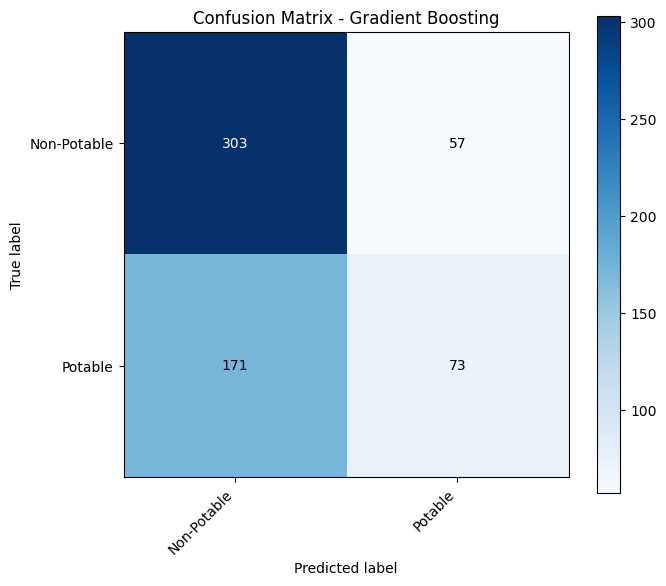

In [28]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=11)
gb_classifier.fit(X_train, y_train)
print("Gradient Boosting model training complete.")

y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb, target_names=['Non-Potable', 'Potable']))

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix (Gradient Boosting):")
print(cm_gb)

# Visualize Confusion Matrix for Gradient Boosting
class_names = ['Non-Potable', 'Potable']
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(cm_gb, interpolation='nearest', cmap=plt.cm.Blues)
fig.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix - Gradient Boosting')
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.set_yticklabels(class_names)
fmt = 'd'
thresh = cm_gb.max() * 0.7 # Adjusted threshold for text color
for i in range(cm_gb.shape[0]):
    for j in range(cm_gb.shape[1]):
        ax.text(j, i, format(cm_gb[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
fig.tight_layout()
plt.show()

Features Scaled
SVM model training complete.
Accuracy (SVM): 0.6805
              precision    recall  f1-score   support

 Non-Potable       0.67      0.91      0.77       360
     Potable       0.73      0.34      0.46       244

    accuracy                           0.68       604
   macro avg       0.70      0.62      0.62       604
weighted avg       0.69      0.68      0.65       604


Confusion Matrix (SVM):
[[329  31]
 [162  82]]


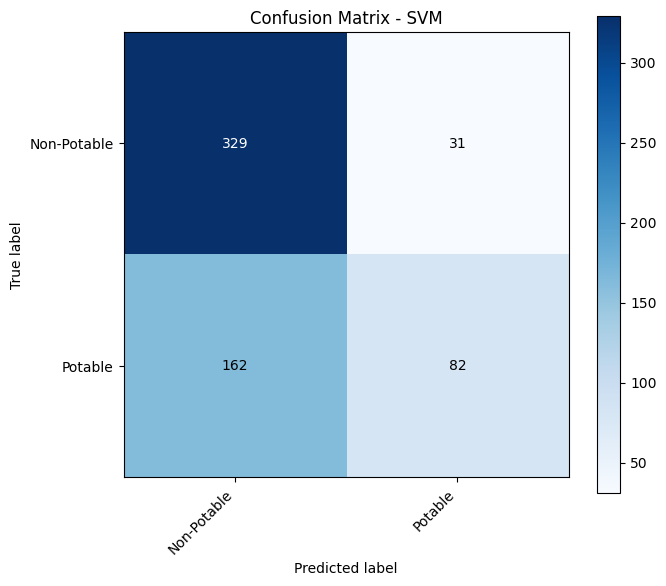

In [29]:
# SVM 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # NEW: For feature scaling
from sklearn.svm import SVC # NEW: Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features Scaled")

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=11)

svm_classifier.fit(X_train_scaled, y_train) # Train on scaled data
print("SVM model training complete.")

y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.4f}")

print(classification_report(y_test, y_pred_svm, target_names=['Non-Potable', 'Potable']))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(cm_svm)

# Visualize Confusion Matrix for SVM
class_names = ['Non-Potable', 'Potable']
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
fig.colorbar(im, ax=ax)
ax.set_title('Confusion Matrix - SVM')
tick_marks = np.arange(len(class_names))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.set_yticklabels(class_names)
fmt = 'd'
thresh = cm_svm.max() * 0.7 # Adjusted threshold for text color
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(j, i, format(cm_svm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_svm[i, j] > thresh else "black")
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
fig.tight_layout()
plt.show()